In [17]:
import pandas as pd
import numpy as np
import seaborn as sns

In [18]:
df=pd.read_csv('Social_Network_Ads.csv')

In [19]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [20]:
x=df.iloc[:,2:4].values
y=df.iloc[:,-1].values

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [22]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [23]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=10,criterion='entropy')
classifier.fit(X_train,y_train)

,n_estimators,10
,criterion,'entropy'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [24]:
y_pred=classifier.predict(X_test)
from sklearn.metrics import accuracy_score,confusion_matrix
print(f"Accuracy: {accuracy_score(y_test,y_pred)*100}%")

Accuracy: 87.5%


<Axes: >

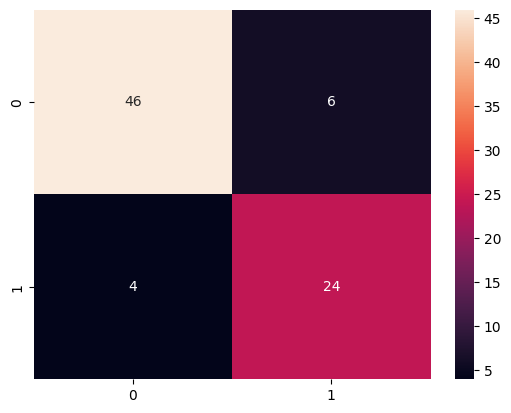

In [25]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

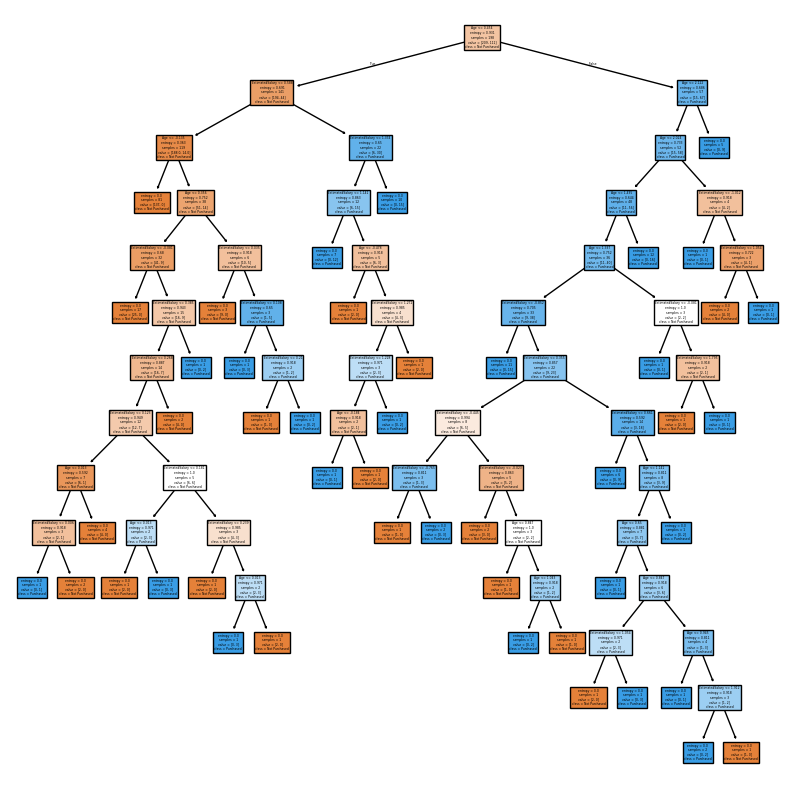

In [26]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
single_tree=classifier.estimators_[0]
plt.figure(figsize=(10,10))
plot_tree(single_tree,filled=True,feature_names=['Age','EstimatedSalary'],class_names=['Not Purchased','Purchased'])
plt.show()